In [1]:
# Import libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# import the dataset:

df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

C:\Users\lavya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


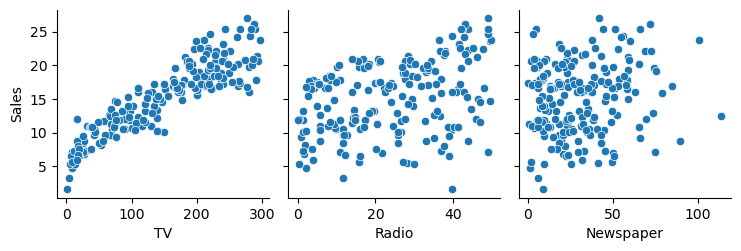

In [7]:
# Let's visualize the data:

sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales')
plt.show()

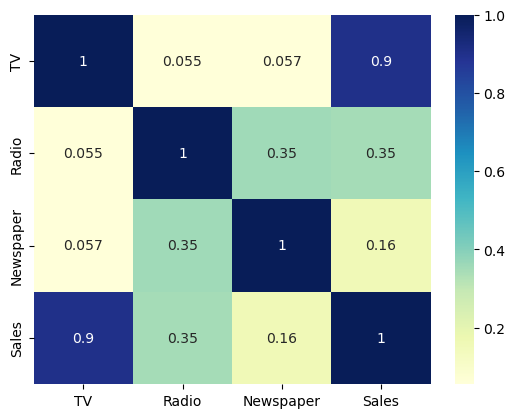

In [8]:
# co-relation matrix:

sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()
#(TV with sales is highly corelated)

In [9]:
X = df['TV']
y = df['Sales']

In [10]:
# split the data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
#Shape of each splitting:

print(
"X_train:", X_train.shape,
"\n y_train:", y_train.shape,
"\n X_test:", X_test.shape,
"\n y_test:", y_test.shape)

X_train: (160,) 
 y_train: (160,) 
 X_test: (40,) 
 y_test: (40,)


In [12]:
#Classification using linear regression:

X_train = X_train.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
intercept = model.intercept_
slope = model.coef_
print("intercept: ", intercept)
print("slope: ", slope)

intercept:  7.007108428241851
slope:  [0.05548294]


In [23]:
res = model.predict(X_test)
print(res)

[16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191  8.75482116 10.12524988
 20.01785878  7.30671633 14.74697911 16.45030549  7.41213392 17.97053815
 11.18497411 20.17875932 19.74044406 10.76885203  9.1154603  20.92777906
 10.83543156  9.97544593 18.85271696 14.73588252 11.84522114  7.47316516
 18.09260063 10.84652815 18.04266598  7.94477018 22.58117079 20.22314567
  9.68693462 22.19279018 13.50970946  8.53288939]


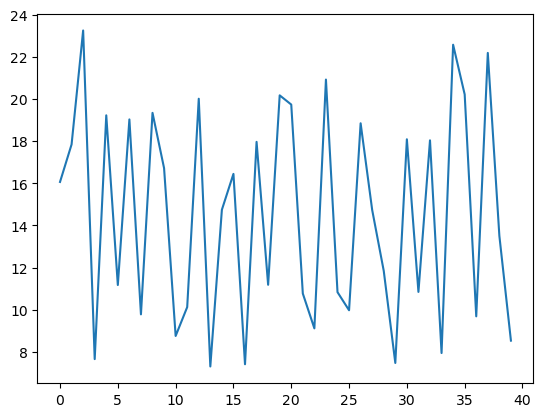

In [24]:
plt.plot(res)

In [14]:
X_test = X_test.values.reshape(-1, 1)

y_pred = model.predict(X_test)
y_pred

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [15]:
# R-squared score or coefficient of determination:
#(It ranges from 0 to 1, with 1 indicating perfect prediction)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.802561303423698


In [16]:
# Mean squared error(MSE):
#(lower MSE indicates a better fit)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 6.101072906773964


In [17]:
# Root mean squared error:

rmse = mse ** 0.5
print("Root mean squared error:", rmse)

Root mean squared error: 2.470035001123256


In [18]:
# Mean absolute error:
#(It's simpler than MSE and more robust to outliers)
#(Lower MAE means that on average, the model is closer to the actual values)

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ", mae)

Mean absolute error:  1.9502948931650088


In [19]:
#Adjusted R-squared:

n = len(y_test)
p = X_test.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Adjusted R-squared: 0.7973655482506374


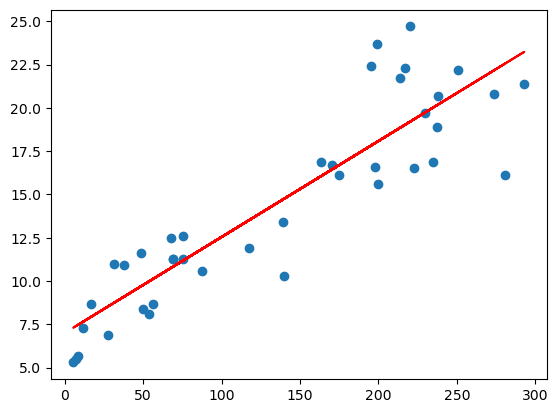

In [20]:
#Visualize the fit on the test set:

plt.scatter(X_test, y_test)
plt.plot(X_test, 7.0071 + 0.0554 * X_test, 'r')
plt.show()

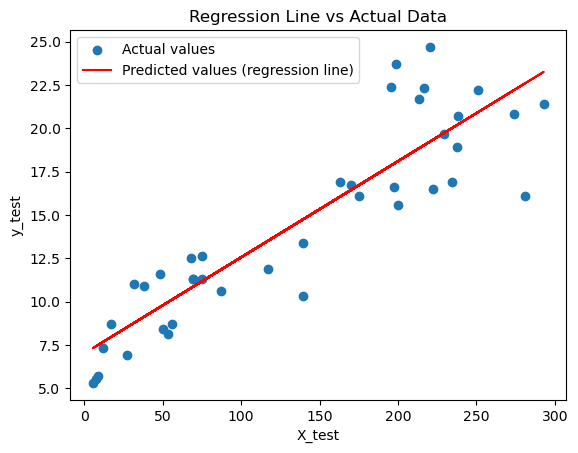

In [21]:
#Scatter plot with regression line:
#(Plot the actual vs. predicted values to visually inspect the model’s fit)

plt.scatter(X_test, y_test, label="Actual values")
plt.plot(X_test, model.predict(X_test), color='red', label="Predicted values (regression line)")
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.title("Regression Line vs Actual Data")
plt.legend()
plt.show()

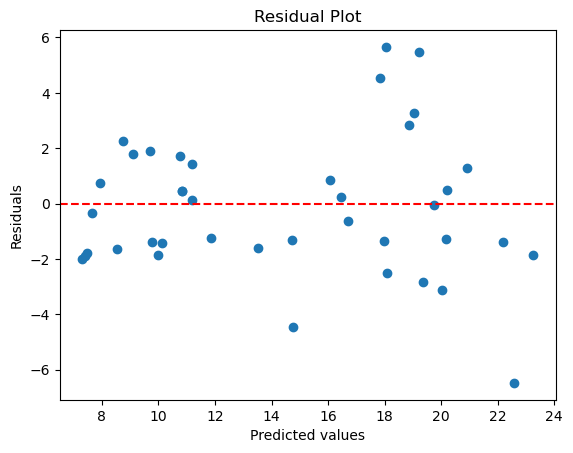

In [22]:
# Residual Plot:
#(residuals should be randomly distributed)

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [25]:
# It's able to predict the the sales using advertising platform dataset.
# In this dataset accuracy won't go high as expected. 
# that's why we are considering only TV feature set.
# which is highly corelated with sales.